author: Songyang Cheng
date: 0915

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [104]:
%matplotlib inline

# Upper State St. Pedestrian Counts
https://data-cityofmadison.opendata.arcgis.com/datasets/upper-state-st-pedestrian-counts

In [105]:
pedestrian = pd.read_csv("Upper_State_St._Pedestrian_Counts.csv")
pedestrian.head()

,Time,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId
0,20-08-2018 08:00:00,80,113,82,115,115.0,76.0,1
1,24-08-2018 12:00:00,446,350,445,0,517.0,502.0,2
2,20-08-2018 09:00:00,129,108,117,111,105.0,122.0,3
3,24-08-2018 13:00:00,391,248,370,0,450.0,481.0,4
4,24-08-2018 14:00:00,335,212,281,0,337.0,416.0,5


In [106]:
names = pedestrian.Time.str.split(' ',expand=True)
names.columns = ['date', 'time']
pedestrian = pedestrian.join(names)
pedestrian.head()

,Time,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,time
0,20-08-2018 08:00:00,80,113,82,115,115.0,76.0,1,20-08-2018,08:00:00
1,24-08-2018 12:00:00,446,350,445,0,517.0,502.0,2,24-08-2018,12:00:00
2,20-08-2018 09:00:00,129,108,117,111,105.0,122.0,3,20-08-2018,09:00:00
3,24-08-2018 13:00:00,391,248,370,0,450.0,481.0,4,24-08-2018,13:00:00
4,24-08-2018 14:00:00,335,212,281,0,337.0,416.0,5,24-08-2018,14:00:00


In [107]:
pedestrian.drop(['Time'],axis=1, inplace=True)
pedestrian.head()

,SS_22_State_St__North_Side,SS_23_State_St__South_Side,F200_State_St____Goodman_s,F200_State_St____Art_Center,F341_State_St_,F344_State_St_,ObjectId,date,time
0,80,113,82,115,115.0,76.0,1,20-08-2018,08:00:00
1,446,350,445,0,517.0,502.0,2,24-08-2018,12:00:00
2,129,108,117,111,105.0,122.0,3,20-08-2018,09:00:00
3,391,248,370,0,450.0,481.0,4,24-08-2018,13:00:00
4,335,212,281,0,337.0,416.0,5,24-08-2018,14:00:00


1. What is the top 20 pedestrian flow per street per day?

In [108]:
def plot_street(street_name, color="black", title="", xlabel="xlabel", ylabel="ylabel"):
    street = pedestrian.groupby(pedestrian.date)[street_name].sum()
    street_20 = street.sort_values(ascending = False)[:20]  # only the top twenty
    ax1 = sns.barplot(x = street_20.index, y = street_20.values, color = color)
    ax1.set_title(title, fontsize=50)
    ax1.set_xlabel(xlabel, fontsize=40)
    ax1.set_xticklabels(labels = street_20.index, rotation = 90)
    ax1.set_ylabel(ylabel, fontsize=40)
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    plt.xticks(fontsize=40)
    plt.yticks(fontsize=40)
    
    return street_20

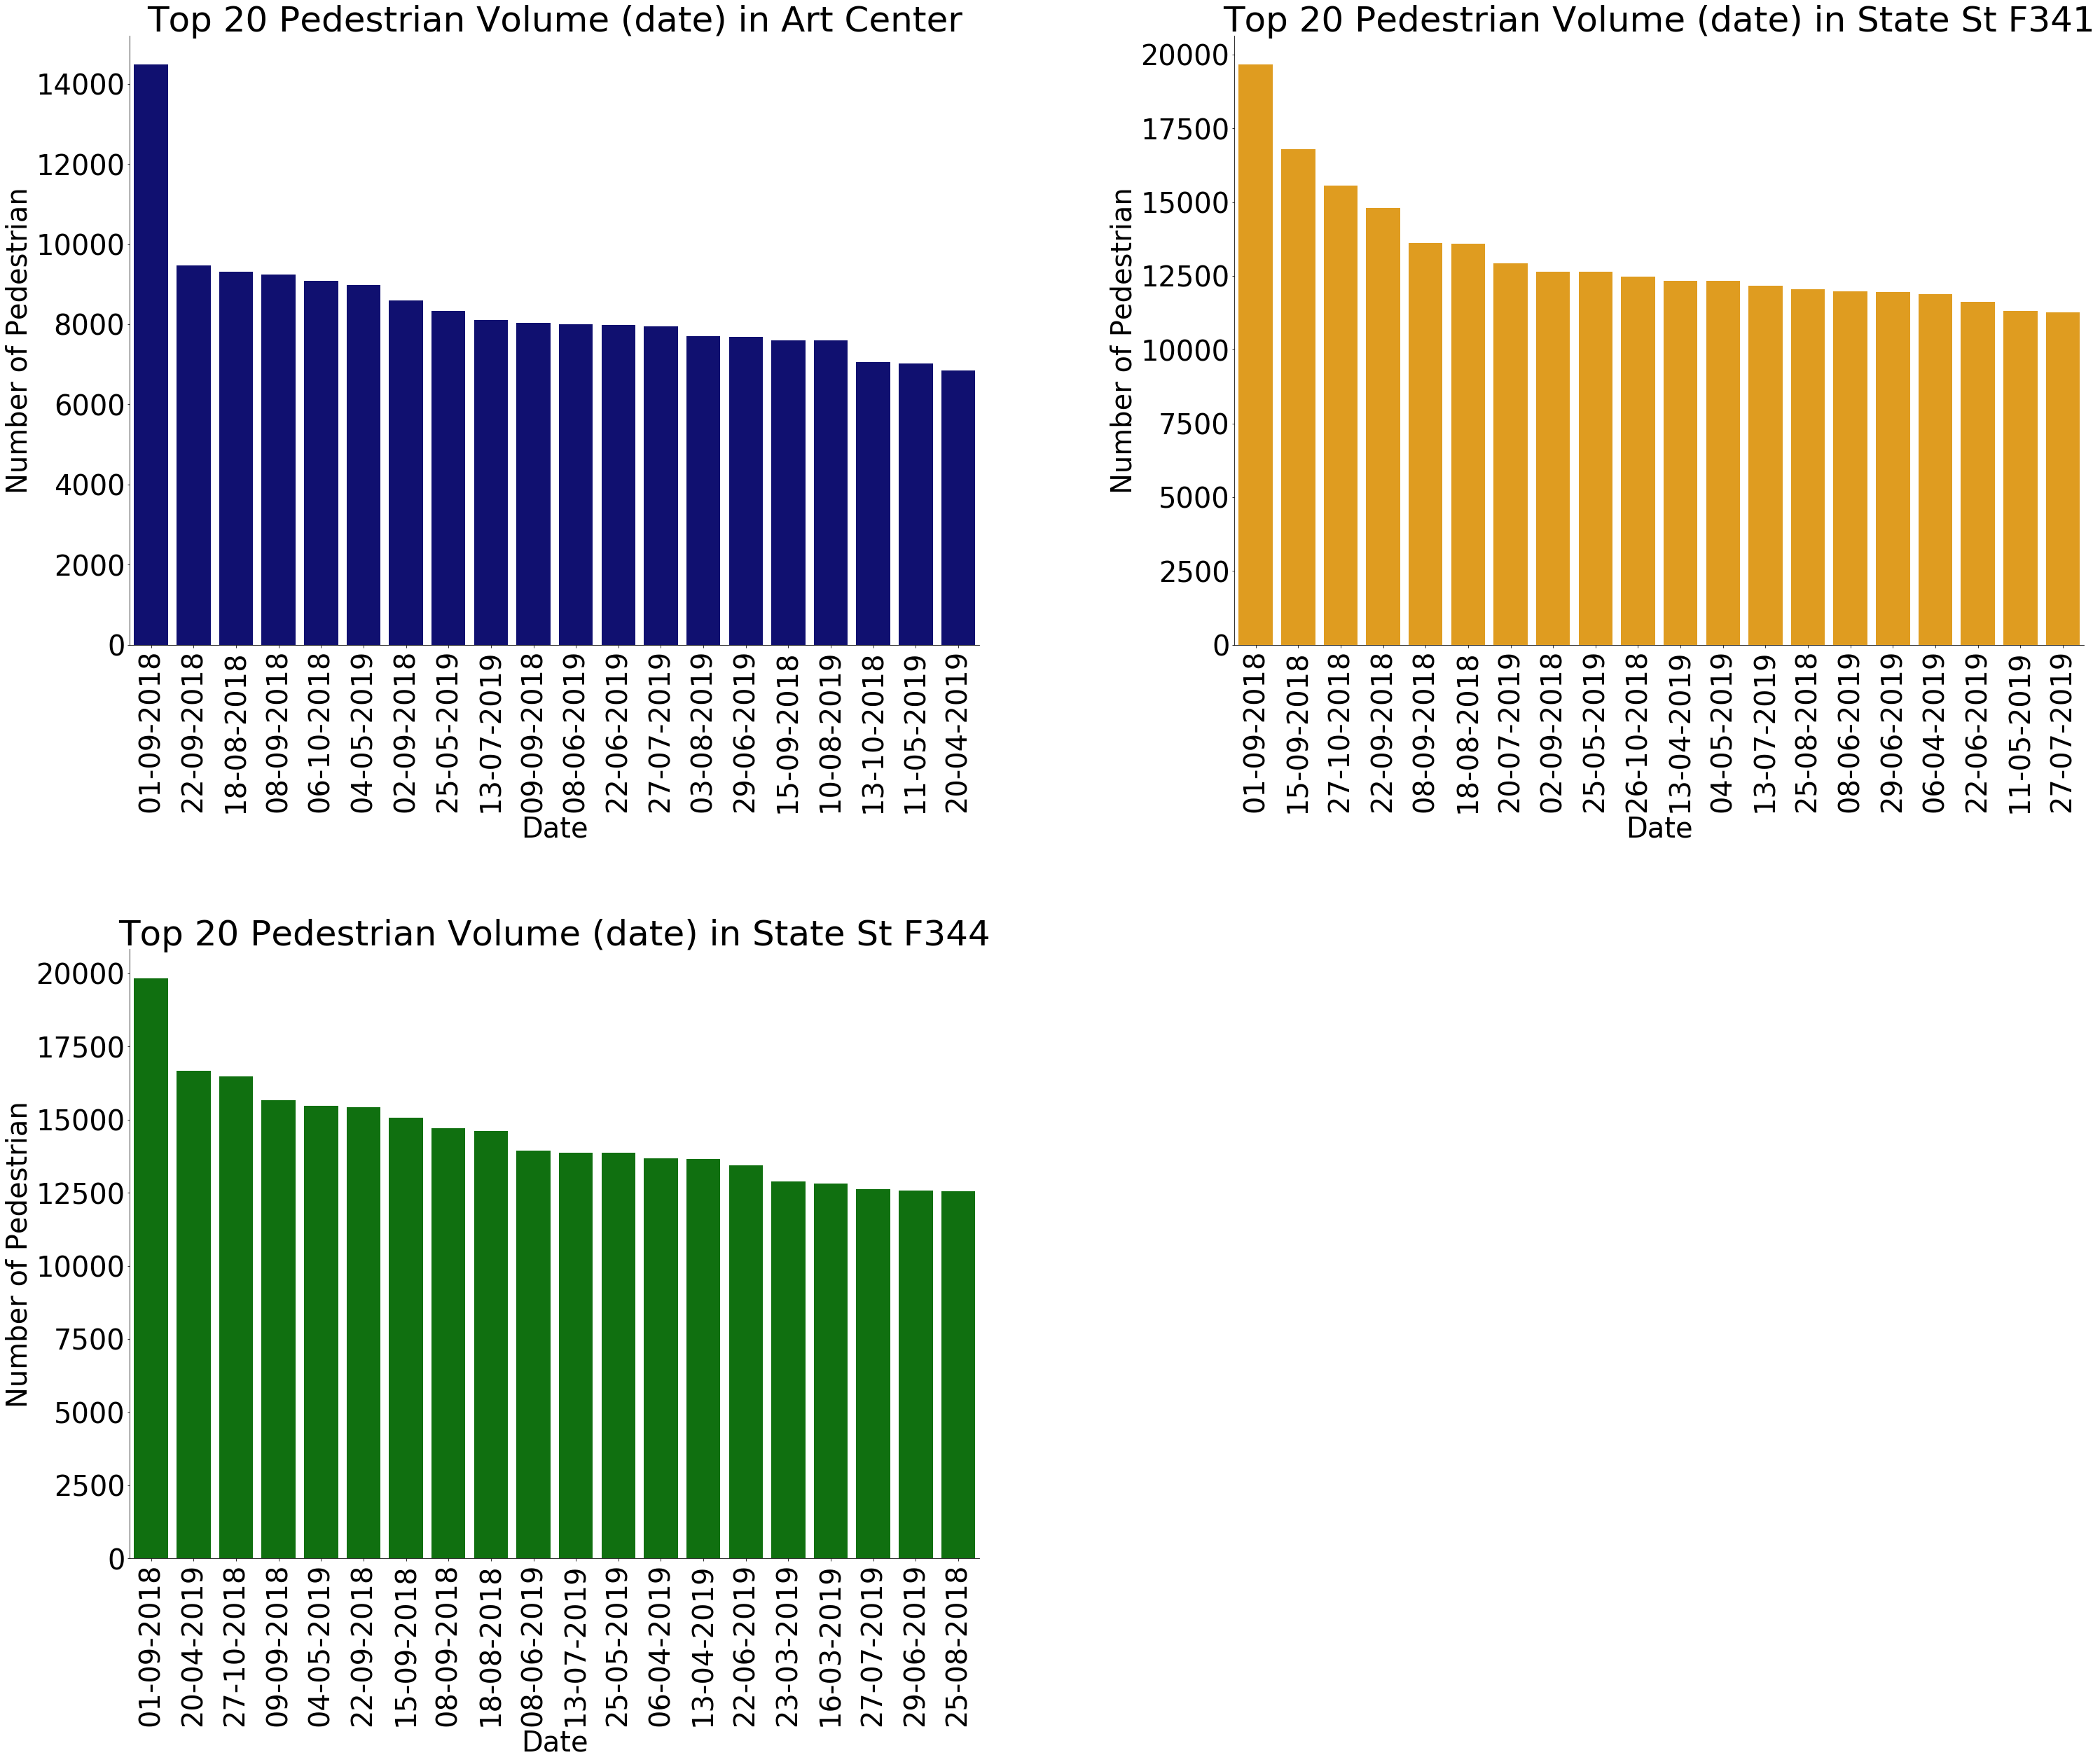

In [109]:
plt.rcParams['figure.figsize'] = (50.0, 40.0)
plt.subplots_adjust(wspace=0.3, hspace=0.5)#调整子图间

plt.subplot(221)  # the first plot
art_center_20 = plot_street("F200_State_St____Art_Center", "navy", "Top 20 Pedestrian Volume (date) in Art Center",
                            xlabel="Date", ylabel="Number of Pedestrian")

plt.subplot(222)  # the second plot
state_f341_20 = plot_street("F341_State_St_", "orange", "Top 20 Pedestrian Volume (date) in State St F341",
                            xlabel="Date", ylabel="Number of Pedestrian")

plt.subplot(223)  # the third plot
state_f344_20 = plot_street("F344_State_St_", "green", "Top 20 Pedestrian Volume (date) in State St F344",
                            xlabel="Date", ylabel="Number of Pedestrian")
None

From the three plots above, we added up the total number of pedestrain on each day and rank from the most to the fewest. 

2. Is there any relevance among these dates?

In [110]:
totalPedestrian = pd.DataFrame(columns=['date','art_center','state_f341','state_f344'])  
number_of_date = 0
for itr in art_center_20.index:
    if(itr in state_f341_20.index and itr in state_f344_20.index):
        number_of_date += 1
        totalPedestrian = totalPedestrian.append(pd.DataFrame({ 'date': [itr],
                                                                'art_center':[art_center_20[itr]],
                                                               'state_f341':[state_f341_20[itr]],
                                                               'state_f344':[state_f344_20[itr]]})
                                                 ,ignore_index=True)

print("There are %d days that are ranked top 20 in these three side"  % number_of_date)


There are 12 days that are ranked top 20 in these three side


In [111]:
totalPedestrian.head()

,date,art_center,state_f341,state_f344
0,01-09-2018,14485,19660.0,19833.0
1,22-09-2018,9461,14794.0,15431.0
2,18-08-2018,9314,13586.0,14604.0
3,08-09-2018,9251,13606.0,14702.0
4,04-05-2019,8975,12332.0,15480.0


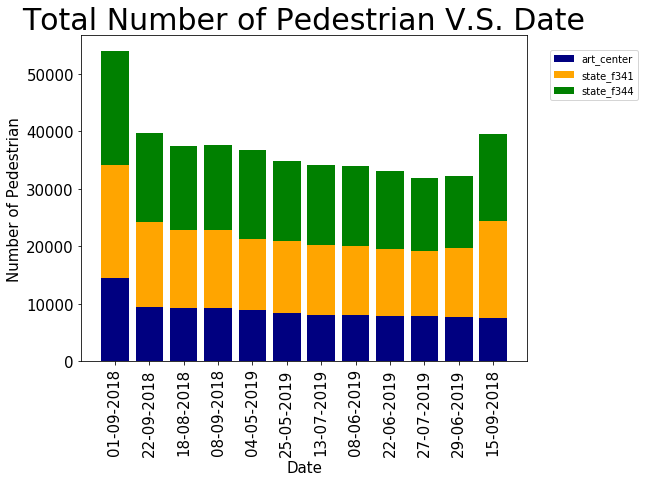

In [114]:
bars = np.add(totalPedestrian.art_center, totalPedestrian.state_f341).tolist()

plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.bar(totalPedestrian.date, totalPedestrian.art_center, color = 'navy', label="art_center")
plt.bar(totalPedestrian.date, totalPedestrian.state_f341, bottom=totalPedestrian.art_center,color = 'orange', label="state_f341")
plt.bar(totalPedestrian.date, totalPedestrian.state_f344, bottom=bars,color = 'green', label="state_f344")
plt.legend(loc=[1.05, 0.8])
plt.title("Total Number of Pedestrian V.S. Date", fontsize=30)
plt.xlabel("Date", fontsize=15)
plt.ylabel("Number of Pedestrian", fontsize=15)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [113]:
# plt.rcParams['figure.figsize'] = (8.0, 6.0)
# ax4 = totalPedestrian.plot(x="date", y="art_center", kind="bar", color="navy")
# totalPedestrian.plot(x="date", y="state_f341", kind="bar", ax=ax4, color="orange")
# totalPedestrian.plot(x="date", y="state_f344", kind="bar", ax=ax4, color="green")

# plt.show()